# Import Required Libraries and Load the Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows to confirm the data structure
print(df.head())


         date  percentile variable  income
0  2019-01-01           1     mean   957.0
1  2019-01-01           2     mean  1284.0
2  2019-01-01           3     mean  1556.0
3  2019-01-01           4     mean  1718.0
4  2019-01-01           5     mean  1858.0


# Data Exploration

Data Preview:
         date  percentile variable  income
0  2019-01-01           1     mean   957.0
1  2019-01-01           2     mean  1284.0
2  2019-01-01           3     mean  1556.0
3  2019-01-01           4     mean  1718.0
4  2019-01-01           5     mean  1858.0

Data Description:
       percentile        income
count  800.000000    796.000000
mean    50.500000   7999.933417
std     28.884128   6698.242786
min      1.000000    957.000000
25%     25.750000   3715.750000
50%     50.500000   6109.000000
75%     75.250000  10093.250000
max    100.000000  62585.000000

Missing Values:
date          0
percentile    0
variable      0
income        4
dtype: int64


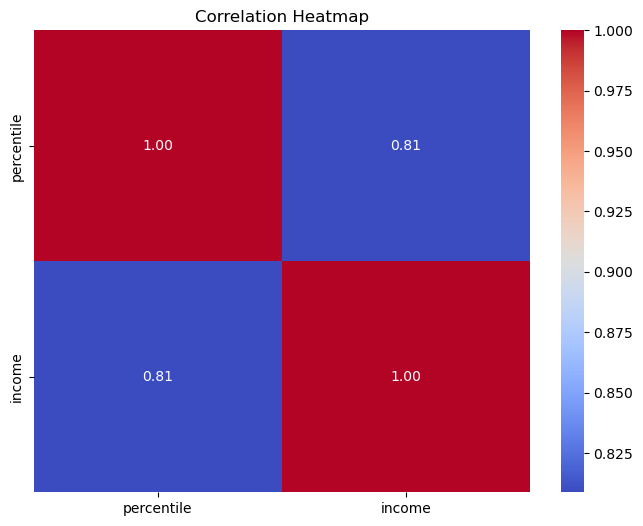

In [16]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows
print("Data Preview:")
print(df.head())

# Summary statistics
print("\nData Description:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values by dropping rows with missing income
df = df.dropna(subset=['income'])

# Correlation heatmap (only numerical columns)
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




*   Percentile: Think of this as a ranking (e.g., the 1st percentile is the lowest rank, and the 100th is the highest).
* Income: This is how much money is earned.





*   As rank increases, income also tends to increase



# Data preporcessing

In [17]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('data.csv')

# Handle missing values
df = df.dropna()  # Dropping rows with missing values

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['percentile', 'income']])
# Display the scaled data
print("\nScaled Data (First 5 rows):")
print(scaled_data[:5])



Scaled Data (First 5 rows):
[[-1.72323891 -1.05212095]
 [-1.688426   -1.00327148]
 [-1.65361309 -0.96263828]
 [-1.61880018 -0.93843763]
 [-1.58398728 -0.91752348]]


# Data Visualisation

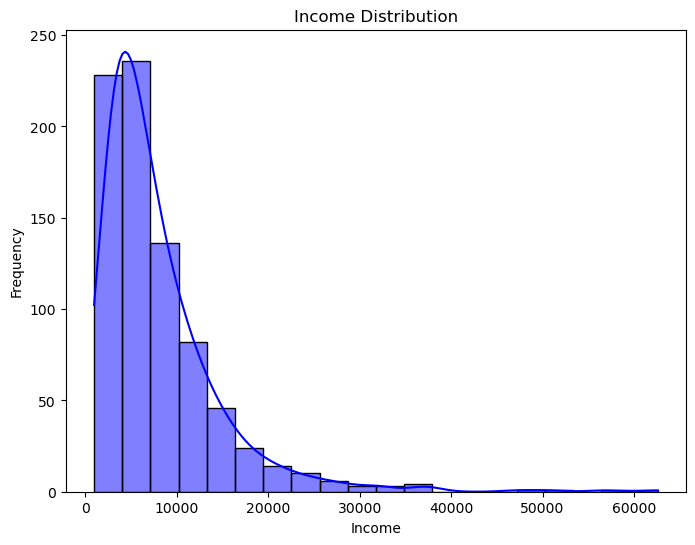

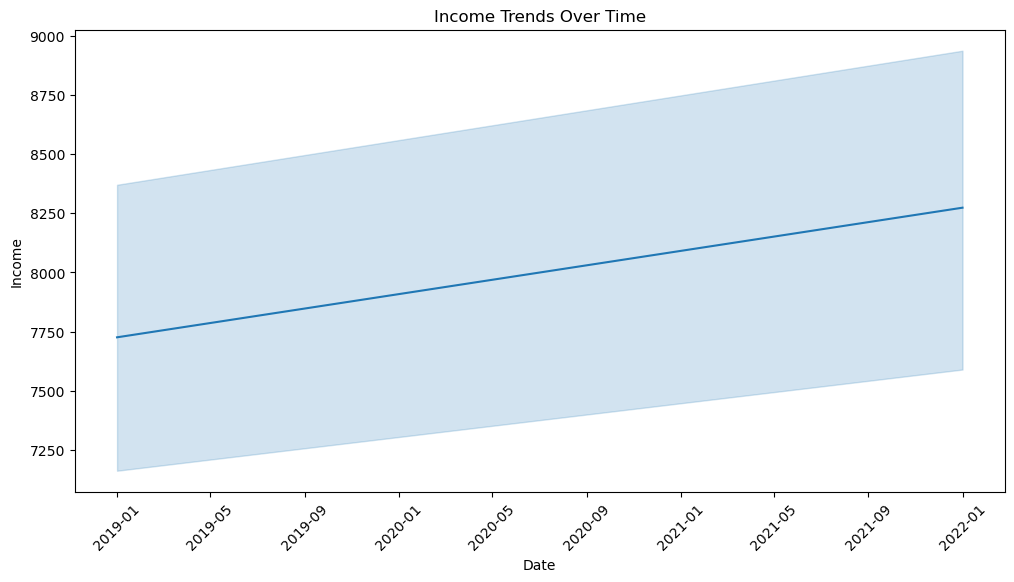

In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

# Plot distribution of 'income'
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], kde=True, bins=20, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize trends over time
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='income', data=df)
plt.title('Income Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


# Machine Learning Model


Model Performance:
Mean Squared Error (MSE): 13160302.521715542
R² Score: 0.6708042145294356


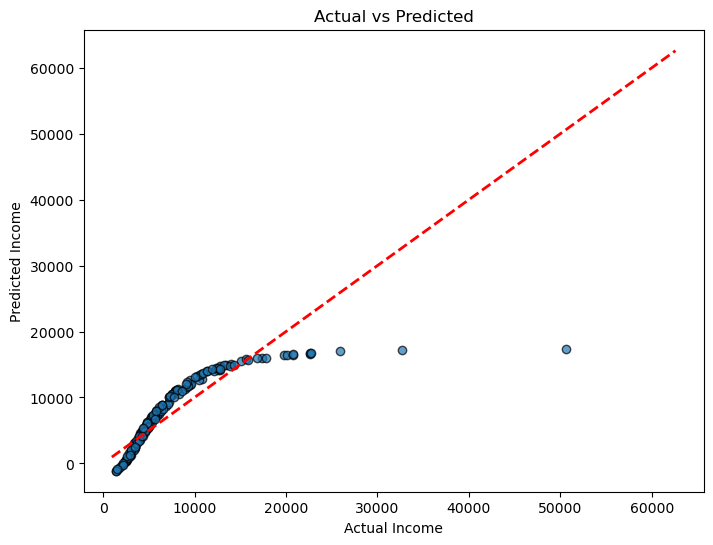

In [19]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv')

# Handle missing values
df = df.dropna()

# Define features and target variable
X = df[['percentile']]
y = df['income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()


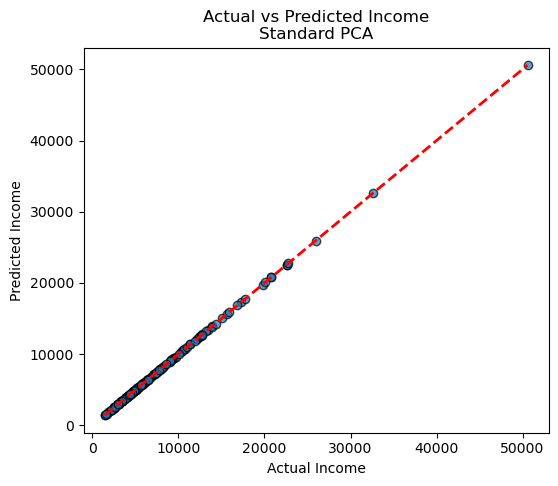

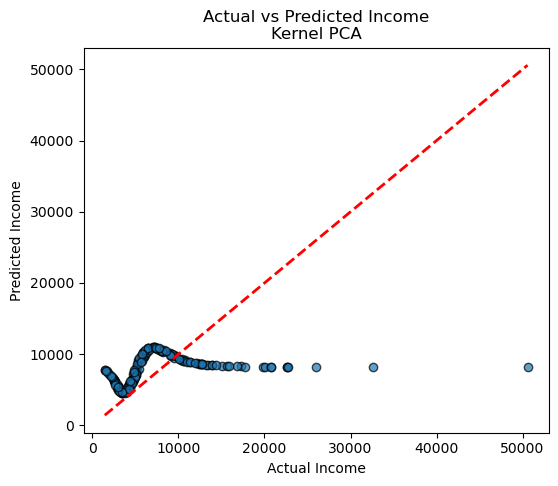

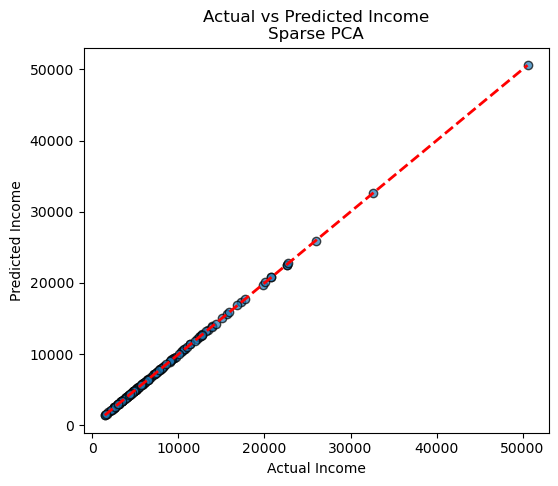


Comparison of Regression Model Performance with Different PCA Methods (Ignoring NaNs):
     PCA Method           MSE  R² Score
0  Standard PCA  4.562418e-25  1.000000
1    Kernel PCA  3.568428e+07  0.107383
2    Sparse PCA  6.731182e-24  1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_32260\1626918449.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='PCA Method', y='R² Score', palette='coolwarm')


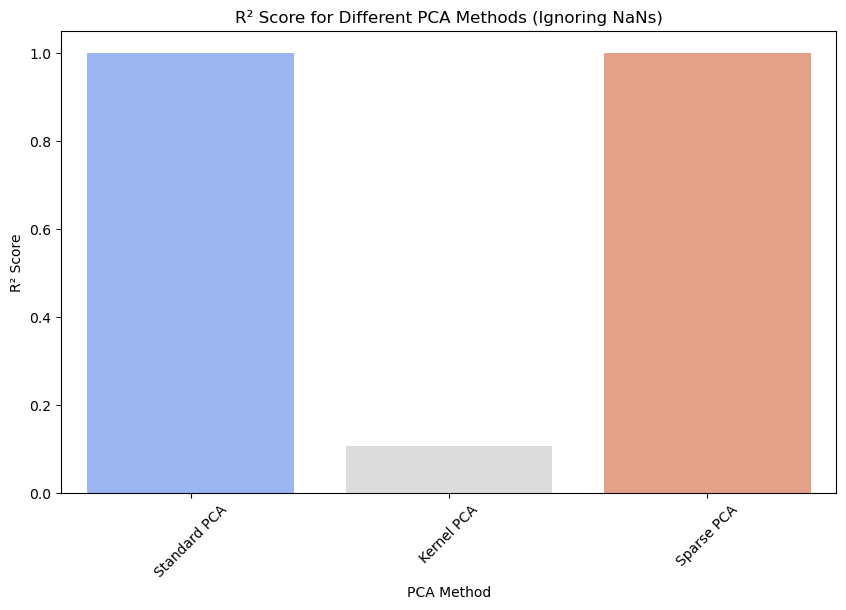

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('data.csv')

# Select numerical features for PCA (excluding categorical and datetime columns)
numerical_features = df.select_dtypes(include=['float64', 'int64'])
target = df['income']  # Target variable

# Create dictionary of PCA methods
pca_methods = {
    'Standard PCA': PCA(n_components=2),
    'Kernel PCA': KernelPCA(n_components=2, kernel='rbf', gamma=15),
    'Sparse PCA': SparsePCA(n_components=2, random_state=42)
}

# Store results for comparison
results = []

# Standardize data (ignoring NaNs dynamically)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.nan_to_num(numerical_features))  # Replaces NaNs with 0 dynamically

# Loop over each PCA method
for pca_name, pca in pca_methods.items():
    try:
        # Apply PCA (ignoring NaNs)
        pca_result = pca.fit_transform(scaled_data)

        # Convert PCA results into a DataFrame, ensuring no NaNs
        df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
        df_pca['income'] = target  # Add target variable back

        # Drop any remaining NaN values before regression
        df_pca = df_pca.dropna()

        # Define features and target variable
        X = df_pca[['PCA1', 'PCA2']]
        y = df_pca['income']

        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate model performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            'PCA Method': pca_name,
            'MSE': mse,
            'R² Score': r2
        })

        # Visualize Actual vs Predicted
        plt.figure(figsize=(6, 5))
        plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Income')
        plt.ylabel('Predicted Income')
        plt.title(f'Actual vs Predicted Income\n{pca_name}')
        plt.show()

    except Exception as e:
        print(f"⚠️ Error with {pca_name}: {e}")

# Convert results into a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the comparison table
print("\nComparison of Regression Model Performance with Different PCA Methods (Ignoring NaNs):")
print(results_df)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='PCA Method', y='R² Score', palette='coolwarm')
plt.title('R² Score for Different PCA Methods (Ignoring NaNs)')
plt.ylabel('R² Score')
plt.xlabel('PCA Method')
plt.xticks(rotation=45)
plt.show()

